In [62]:
%pip install pandas
%pip install seaborn
%pip install numpy
%pip install sklearn
%pip install ntlk

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip in

In [63]:
import pandas as pd
import seaborn as sb
import numpy as np
from collections import  Counter
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt 
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/xavier/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/xavier/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [38]:
df = pd.read_csv('../crawling/cleaned_file.csv', dtype={'id': str}, encoding='latin-1')
df

,topic,title,source,article_link,article,sentiments
0,Microsoft,The Top 7 Tech Stocks to Buy in March 2024,InvestorPlace,https://investorplace.com/2024/03/the-top-7-te...,Microsoft (MSFT) is still growing at a fast pa...,positive
1,Microsoft,Microsoft-owned LinkedIn makes this 'first-eve...,Times of India,https://timesofindia.indiatimes.com/gadgets-ne...,Microsoft-owned LinkedIn generated $1.7 billio...,positive
2,Microsoft,Microsoft debuts Copilot for finance pros,Computerworld,https://www.computerworld.com/article/3714142/...,Microsoft has launched a Copilot assistant for...,neutral
3,Microsoft,Microsoft's Path to Becoming the Largest Compa...,The Motley Fool,https://www.fool.com/investing/2024/03/06/micr...,Microsoft's Path to Becoming the Largest Compa...,positive
4,Microsoft,Top Analyst Brad Reback Weighs in on Microsoft...,Tipranks,https://www.tipranks.com/news/top-analyst-brad...,Non-deal roadshows (NDRs) allow institutional ...,positive
...,...,...,...,...,...,...
10856,Crowdstrike Holdings,CrowdStrike (CRWD) Q4 Earnings Report Preview:...,Yahoo Finance,https://finance.yahoo.com/news/crowdstrike-crw...,"In this article, CrowdStrike (NASDAQ:CRWD) wil...",positive
10857,Crowdstrike Holdings,CRWD Stock Earnings: CrowdStrike Holdings Beat...,InvestorPlace,https://investorplace.com/earning-results/2024...,CrowdStrike Holdings (NASDAQ: CRWD) just repor...,neutral
10858,Crowdstrike Holdings,"Insider Selling: CrowdStrike Holdings, Inc. (N...",Defense World,https://www.defenseworld.net/2024/03/24/inside...,"CrowdStrike Holdings, Inc. (NASDAQ:CRWD) Presi...",negative
10859,Crowdstrike Holdings,CrowdStrike (NASDAQ:CRWD) Shares Down 0.2% on ...,MarketBeat,https://www.marketbeat.com/instant-alerts/nasd...,"CrowdStrike Holdings, Inc. (NASDAQ:CRWD) share...",negative


In [39]:
# Remove any duplicate articles
df = df.drop_duplicates(subset=["article"])
df

,topic,title,source,article_link,article,sentiments
0,Microsoft,The Top 7 Tech Stocks to Buy in March 2024,InvestorPlace,https://investorplace.com/2024/03/the-top-7-te...,Microsoft (MSFT) is still growing at a fast pa...,positive
1,Microsoft,Microsoft-owned LinkedIn makes this 'first-eve...,Times of India,https://timesofindia.indiatimes.com/gadgets-ne...,Microsoft-owned LinkedIn generated $1.7 billio...,positive
2,Microsoft,Microsoft debuts Copilot for finance pros,Computerworld,https://www.computerworld.com/article/3714142/...,Microsoft has launched a Copilot assistant for...,neutral
3,Microsoft,Microsoft's Path to Becoming the Largest Compa...,The Motley Fool,https://www.fool.com/investing/2024/03/06/micr...,Microsoft's Path to Becoming the Largest Compa...,positive
4,Microsoft,Top Analyst Brad Reback Weighs in on Microsoft...,Tipranks,https://www.tipranks.com/news/top-analyst-brad...,Non-deal roadshows (NDRs) allow institutional ...,positive
...,...,...,...,...,...,...
10856,Crowdstrike Holdings,CrowdStrike (CRWD) Q4 Earnings Report Preview:...,Yahoo Finance,https://finance.yahoo.com/news/crowdstrike-crw...,"In this article, CrowdStrike (NASDAQ:CRWD) wil...",positive
10857,Crowdstrike Holdings,CRWD Stock Earnings: CrowdStrike Holdings Beat...,InvestorPlace,https://investorplace.com/earning-results/2024...,CrowdStrike Holdings (NASDAQ: CRWD) just repor...,neutral
10858,Crowdstrike Holdings,"Insider Selling: CrowdStrike Holdings, Inc. (N...",Defense World,https://www.defenseworld.net/2024/03/24/inside...,"CrowdStrike Holdings, Inc. (NASDAQ:CRWD) Presi...",negative
10859,Crowdstrike Holdings,CrowdStrike (NASDAQ:CRWD) Shares Down 0.2% on ...,MarketBeat,https://www.marketbeat.com/instant-alerts/nasd...,"CrowdStrike Holdings, Inc. (NASDAQ:CRWD) share...",negative


In [40]:
# Total number of Topics to be Analyzed
unique_count = df['topic'].nunique()

print(f"Number of topics: {unique_count}")

Number of topics: 130


/var/folders/14/7ybs8ld16j96lm7k4q84hjbm0000gn/T/ipykernel_98247/1058972898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['article'].apply(lambda x: len(str(x).split()))


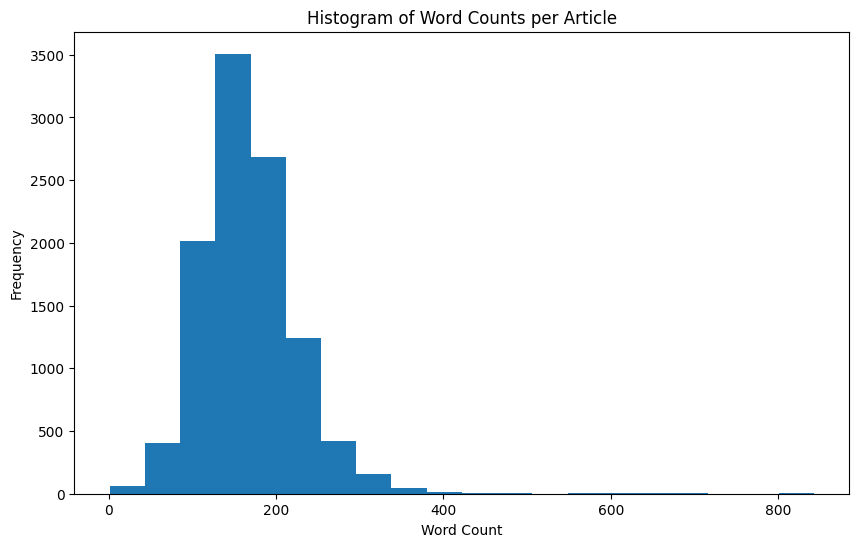

In [67]:
# Word count to ensure that BERT Tokenization can handle all the inputs
df['word_count'] = df['article'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 6))
plt.hist(df['word_count'], bins=20)
plt.title('Histogram of Word Counts per Article')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

sentiments
positive    4438
neutral     3275
negative    2874
Name: count, dtype: int64


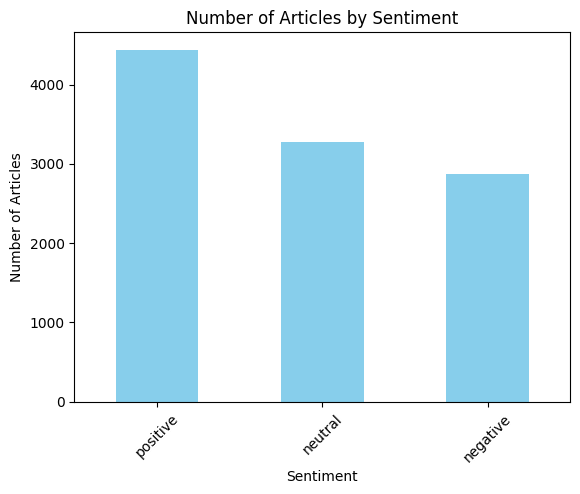

In [49]:
# Count the total number of articles for each sentiment

sentiment_counts = df['sentiments'].value_counts()

print(sentiment_counts)

sentiment_counts.plot(kind='bar', color='skyblue')

plt.title('Number of Articles by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)  # Rotate labels to make them readable
plt.show()

In [60]:
# Identify the top words for each sentiment
positive_texts = df[df['sentiments'] == 'positive']['article']
negative_texts = df[df['sentiments'] == 'negative']['article']
neutral_texts = df[df['sentiments'] == 'neutral']['article']

def count_words(texts):
    words = Counter()
    for text in texts:
        # Simple tokenization based on whitespace and lowercasing words
        if pd.isna(text):
            continue  # Skip NaN values

        words.update(re.findall(r'\b\w+\b', text.lower()))
    return words

positive_word_counts = count_words(positive_texts)
negative_word_counts = count_words(negative_texts)
neutral_word_counts = count_words(neutral_texts)

top_20_positive = positive_word_counts.most_common(20)
top_20_negative = negative_word_counts.most_common(20)
top_20_neutral = neutral_word_counts.most_common(20)

print("Top 20 Positive Words:", top_20_positive)
print("Top 20 Negative Words:", top_20_negative)
print("Top 20 Neutral Words:", top_20_neutral)

Top 20 Positive Words: [('the', 45203), ('of', 20490), ('and', 19851), ('to', 19141), ('a', 17498), ('in', 16307), ('s', 12783), ('is', 10153), ('its', 8824), ('for', 8092), ('company', 8018), ('has', 6787), ('on', 6518), ('year', 6246), ('with', 5441), ('by', 4597), ('that', 4566), ('growth', 4481), ('as', 4284), ('earnings', 4132)]
Top 20 Negative Words: [('the', 29905), ('of', 13792), ('to', 11082), ('a', 10380), ('and', 9658), ('in', 9025), ('s', 8098), ('is', 5313), ('company', 4948), ('on', 4473), ('its', 4347), ('for', 4173), ('year', 3920), ('has', 3874), ('that', 3116), ('from', 2772), ('earnings', 2760), ('1', 2696), ('stock', 2628), ('quarter', 2620)]
Top 20 Neutral Words: [('the', 32242), ('of', 16706), ('and', 16056), ('a', 14080), ('to', 13025), ('in', 9258), ('is', 7960), ('s', 7536), ('for', 5335), ('company', 5010), ('on', 4721), ('has', 4313), ('that', 4218), ('as', 3604), ('its', 3576), ('with', 3452), ('it', 3251), ('stock', 3241), ('are', 2874), ('at', 2577)]


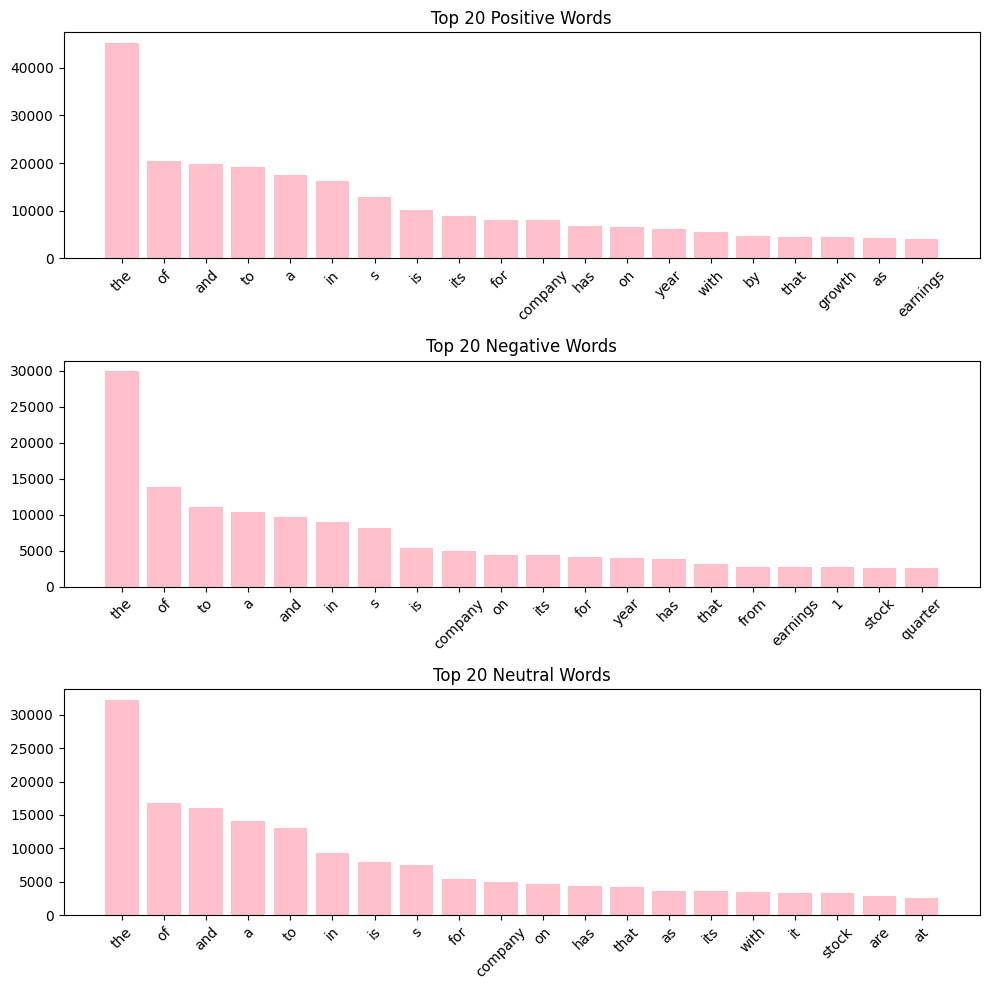

In [65]:
def plot_histogram(top_20, title, ax):
    words = [word for word, count in top_20]
    counts = [count for word, count in top_20]
    ax.bar(words, counts, color='pink')
    ax.set_title(title)
    ax.tick_params(axis='x', rotation=45)

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

# Plotting each category
plot_histogram(top_20_positive, 'Top 20 Positive Words', axs[0])
plot_histogram(top_20_negative, 'Top 20 Negative Words', axs[1])
plot_histogram(top_20_neutral, 'Top 20 Neutral Words', axs[2])

# Adjust layout
plt.tight_layout()
plt.show()

/var/folders/14/7ybs8ld16j96lm7k4q84hjbm0000gn/T/ipykernel_98247/1919706829.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['article'] = df['article'].fillna('')
/var/folders/14/7ybs8ld16j96lm7k4q84hjbm0000gn/T/ipykernel_98247/1919706829.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_stop_words'] = df['article'].apply(lambda x: remove_stopwords(x))


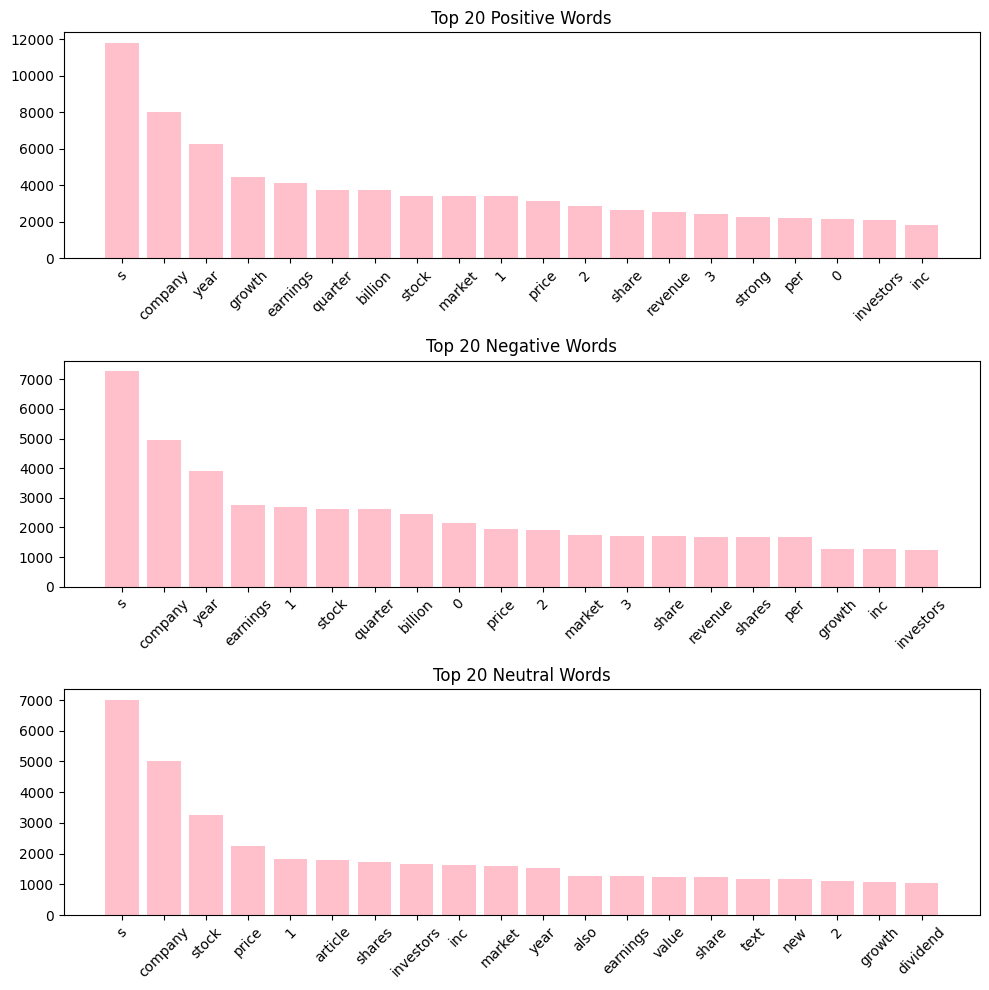

In [72]:
# Removing the stop words

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

df['article'] = df['article'].fillna('')
df['no_stop_words'] = df['article'].apply(lambda x: remove_stopwords(x))

positive_texts = df[df['sentiments'] == 'positive']['no_stop_words']
negative_texts = df[df['sentiments'] == 'negative']['no_stop_words']
neutral_texts = df[df['sentiments'] == 'neutral']['no_stop_words']

positive_word_counts = count_words(positive_texts)
negative_word_counts = count_words(negative_texts)
neutral_word_counts = count_words(neutral_texts)

top_20_positive = positive_word_counts.most_common(20)
top_20_negative = negative_word_counts.most_common(20)
top_20_neutral = neutral_word_counts.most_common(20)

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

# Plotting each category
plot_histogram(top_20_positive, 'Top 20 Positive Words', axs[0])
plot_histogram(top_20_negative, 'Top 20 Negative Words', axs[1])
plot_histogram(top_20_neutral, 'Top 20 Neutral Words', axs[2])

# Adjust layout
plt.tight_layout()
plt.show()